<a href="https://colab.research.google.com/github/Enesagirman7/Model-for-Emotion-Analysis-from-Facial-Expressions/blob/main/bitirmeProjesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Görüntüleri eğitim sırasında ön işleme ve veri artırımı yapmak için kullanılır.
from tensorflow.keras.models import Sequential #CNN yapısı için gerekli
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D #sinir ağına katmanlar eklemek için kullanılır
import os

In [ ]:
train_data_dir = '/content/drive/MyDrive/veriseti/train'
validation_data_dir = '/content/drive/MyDrive/veriseti/test'
#datayı çektiğimiz dosya yeri

In [ ]:
train_datagen = ImageDataGenerator(
					rescale=1./255,
					rotation_range=30,
					shear_range=0.3,
					zoom_range=0.3,
					horizontal_flip=True,
					fill_mode='nearest')
#üstteki yapı, eğitim sırasında her seferinde görüntüyü biraz farklı hale getirerek modelin daha sağlam öğrenmesini sağlar.
validation_datagen = ImageDataGenerator(rescale=1./255) #modelin gerçek görüntüler üzerindeki başarısını ölçmek için tanımlama yaptık.

In [ ]:
train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(48, 48),
					batch_size= 32,
					class_mode='categorical',
					shuffle=True)

validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(48, 48),
							batch_size=32,
							class_mode='categorical',
							shuffle=True)
#train ve validation için otomatik olarak okuma,etiketleme ve hazırlama işlemlerini gerçekleştirir.
#verilerin bulunduğu klasör, kaç piksel görüntü olacağı, aynı anda modele verilecek görüntü sayısı vs.

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
class_labels=['Angry','Disgust', 'Fear', 'Happy','Neutral','Sad','Surprise']

img, label = train_generator.__next__()
#sınıf etiketlerini verdik.

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())
#CNN modeli ile model eğitimi başlattık.
#print ile yazdırdığımızda ise Modelin katman yapısını, çıktı boyutlarını ve toplam parametre sayısını yazdırır.

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
train_path = "/content/drive/MyDrive/veriseti/train"
test_path = "/content/drive/MyDrive/veriseti/test"
#train ve test için datayı nereden alacağımızı yazdık.

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

#tüm klasörleri gezerek toplam train ve test data sayısını hesaplar.

In [ ]:
print(num_train_imgs)
print(num_test_imgs)
#hesapladığımız total train ve test veri sayılarını yazdırdık.

28709
7178


In [ ]:
epochs = 60

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32)

model.save('/content/drive/MyDrive/veriseti/model_file100epochs.h5')
#60 epochs sayısına göre eğitim yaptık ve h5 dosyası olarak kaydettik.

Epoch 1/60
897/897 ━━━━━━━━━━━━━━━━━━━━ 2717s 3s/step - accuracy: 0.3096 - loss: 1.7009 - val_accuracy: 0.4222 - val_loss: 1.4969
Epoch 2/60
  1/897 ━━━━━━━━━━━━━━━━━━━━ 6:42 449ms/step - accuracy: 0.2500 - loss: 1.6937

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.2500 - loss: 1.6937 - val_accuracy: 0.4213 - val_loss: 1.4966
Epoch 3/60
897/897 ━━━━━━━━━━━━━━━━━━━━ 587s 633ms/step - accuracy: 0.3764 - loss: 1.5785 - val_accuracy: 0.4728 - val_loss: 1.3846
Epoch 4/60
897/897 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.5000 - loss: 1.6560 - val_accuracy: 0.4735 - val_loss: 1.3852
Epoch 5/60
897/897 ━━━━━━━━━━━━━━━━━━━━ 578s 631ms/step - accuracy: 0.4215 - loss: 1.4957 - val_accuracy: 0.4971 - val_loss: 1.3158
Epoch 6/60
897/897 ━━━━━━━━━━━━━━━━━━━━ 82s 91ms/step - accuracy: 0.6562 - loss: 0.9804 - val_accuracy: 0.4960 - val_loss: 1.3142
Epoch 7/60
897/897 ━━━━━━━━━━━━━━━━━━━━ 607s 639ms/step - accuracy: 0.4502 - loss: 1.4259 - val_accuracy: 0.4999 - val_loss: 1.3120
Epoch 8/60
897/897 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 0.4062 - loss: 1.4812 - val_accuracy: 0.5025 - val_loss: 1.3055
Epoch 9/60
897/897 ━━━━━━━━━━━━━━━━━━━━ 571s 631ms/step - accuracy: 0.4681 - loss: 1.3854 - val

In [ ]:
from keras.models import load_model, save_model

model = load_model("/content/drive/MyDrive/veriseti/model_file100epochs.h5")

save_model(model, "/content/drive/MyDrive/veriseti/model_file60epochs.keras")

#.h5 metodu eski bir metod olduğu için .keras formatında kaydettik.

In [ ]:
epochs = 50

history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//32,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//32)

model.save('/content/drive/MyDrive/veriseti/model_file60artı50epochs.keras')

#50 epochs daha eğitim yapıp yazdırdık.
#GÜNCEL MAKSİMUM DOĞRULUK ORANIMIZ %75 OLUP DOĞRULUK ORANI %60-%75 ARALIĞINDA DEĞİŞKENLİK GÖSTERMEKTEDİR.

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 7026s 8s/step - accuracy: 0.5807 - loss: 1.1075 - val_accuracy: 0.6009 - val_loss: 1.0704
Epoch 2/50
  1/897 ━━━━━━━━━━━━━━━━━━━━ 7:17 488ms/step - accuracy: 0.6250 - loss: 1.1026

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


897/897 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.6250 - loss: 1.1026 - val_accuracy: 0.5988 - val_loss: 1.0706
Epoch 3/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 602s 635ms/step - accuracy: 0.5798 - loss: 1.1046 - val_accuracy: 0.6062 - val_loss: 1.0555
Epoch 4/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.5312 - loss: 1.2483 - val_accuracy: 0.6073 - val_loss: 1.0554
Epoch 5/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 565s 630ms/step - accuracy: 0.5744 - loss: 1.1124 - val_accuracy: 0.6004 - val_loss: 1.0771
Epoch 6/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.4375 - loss: 1.0385 - val_accuracy: 0.6009 - val_loss: 1.0792
Epoch 7/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 621s 679ms/step - accuracy: 0.5756 - loss: 1.1094 - val_accuracy: 0.6034 - val_loss: 1.0604
Epoch 8/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 45s 49ms/step - accuracy: 0.5938 - loss: 1.1338 - val_accuracy: 0.6032 - val_loss: 1.0635
Epoch 9/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 573s 639ms/step - accuracy: 0.5848 - loss: 1.1001 - val

# görsel ile test datası

In [ ]:
import cv2 #openCV için.
import numpy as np #numpy kütüphanesi
import matplotlib.pyplot as plt #Çizim yapmak için gerekli olan kod.
from keras.models import load_model #eğittiğimiz modeli getirmek için gerekli olan kütüphane.

In [ ]:
model=load_model('/content/drive/MyDrive/veriseti/model_file60artı50epochs.keras')

faceDetect=cv2.CascadeClassifier('/content/drive/MyDrive/veriseti/haarcascade_frontalface_default.xml')

labels_dict={0:'Angry',1:'Disgust', 2:'Fear', 3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

#modeli yükledik, Yüz tespit sınıflayıcısını yükledik ve tahmin sonucunu sınıf etiketi ile etiketlemesini sağladık.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


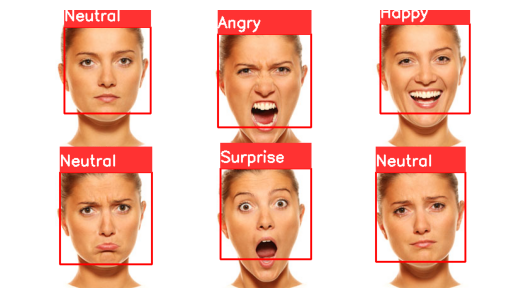

In [ ]:
# Görüntüyü nereden okuyacağını gösterdiğimiz kod
frame = cv2.imread("/content/drive/MyDrive/veriseti/test2.jpg")
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Yüzleri bulup algılaması için kod.
faces = faceDetect.detectMultiScale(gray, 1.3, 3)

# Modelin yüzlere göre tahmin yapması için gerekli kodlar
for x, y, w, h in faces:
    sub_face_img = gray[y:y+h, x:x+w]
    resized = cv2.resize(sub_face_img, (48, 48))
    normalize = resized / 255.0
    reshaped = np.reshape(normalize, (1, 48, 48, 1))
    result = model.predict(reshaped)
    label = np.argmax(result, axis=1)[0]

    # Görsel işaretlemelerin yapıldığı kodlamalar.
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.rectangle(frame, (x, y-40), (x+w, y), (50, 50, 255), -1)
    cv2.putText(frame, labels_dict.get(label, 'Bilinmiyor'), (x, y-10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

# Colab’da görüntüyü gösterip çizmesi için gerekli olan kod.
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


#Kamera ile test datası

In [ ]:
import cv2
import numpy as np
from keras.models import load_model
import time
#kütüphaneleri import ettik. Time kütüphanesini frame arasına delay koymak için ekledik.

model = load_model(r'C:\Users\ASUS\Desktop\bitirme projesi\veriseti\model_file60artı50epochs.keras')
faceDetect = cv2.CascadeClassifier(r"C:\Users\ASUS\Desktop\bitirme projesi\veriseti\haarcascade_frontalface_default.xml")
labels_dict = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Neutral', 5:'Sad', 6:'Surprise'}
#yukarıda yüs tanıma modeli ve sınıflandırıcı ekledik. sözlük oluşturduk.

video = cv2.VideoCapture(0) #kamerayı bağladık.

while True:
    ret, frame = video.read()
    if not ret:
        print("❌ Kamera görüntüsü alinamadi!")
        break
#sürekli olarak görüntü çekmesi için döngü oluşturduk.
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceDetect.detectMultiScale(gray, 1.3, 3) #detectmultiscale ile yüzleri tespit ettik.
    for x, y, w, h in faces:
        sub_face_img = gray[y:y+h, x:x+w]
        resized = cv2.resize(sub_face_img, (48, 48))
        normalize = resized / 255.0
        reshaped = np.reshape(normalize, (1, 48, 48, 1))
        result = model.predict(reshaped)
        label = np.argmax(result, axis=1)[0]
#yukarıda ise modelin boyutu,normalizesi ve dönüşümü yapılıp en yakın duygunun  etiketini alır.
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 1)
        cv2.rectangle(frame, (x, y-40), (x+w, y), (50, 50, 255), -1)
        cv2.putText(frame, labels_dict[label], (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)
#yüzün etrafına kırmızı dikdörtgen çizilir ve duygunun etiketini yazdırır.

    cv2.imshow("Frame", frame) #işlenmiş görüntüyü ekranda gösterir.
    time.sleep(0.10) #frameler arası 100 ms gecikme ekledik.
    k = cv2.waitKey(1)
    if k == ord('q'): #q tuşuna basınca ekrandan çıkış yapılır.
        break

video.release()
cv2.destroyAllWindows()